# Entrenamiento estocástico y por bloques

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
session = tf.Session()

In [40]:
batch_size = 25

In [41]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(a=10.0, repeats=200)

In [51]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random.normal(shape=[1,1]))

In [52]:
y_pred = tf.matmul(x_data, A)

In [53]:
loss = tf.reduce_mean(tf.square(y_pred - y_vals))

In [54]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.025)
train = optimizer.minimize(loss)

In [55]:
init = tf.global_variables_initializer()
session.run(init)

### Entrenamiento por bloques

In [47]:
loss_batch = []

for i in range(200):
    rand_index = np.random.choice(200, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train, feed_dict={x_data: rand_x, y_data: rand_y})
    if (i+1)%5 == 0:
        temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_data: rand_y})
        print("Paso #{}, A = {}, Loss: {}".format(i+1, session.run(A), temp_loss))
        loss_batch.append(temp_loss)

Paso #5, A = [[1.8635186]], Loss: 66.18617248535156
Paso #10, A = [[3.6774473]], Loss: 41.49720764160156
Paso #15, A = [[5.1015997]], Loss: 24.397613525390625
Paso #20, A = [[6.195949]], Loss: 14.092888832092285
Paso #25, A = [[7.0379453]], Loss: 9.592601776123047
Paso #30, A = [[7.7057667]], Loss: 6.887857913970947
Paso #35, A = [[8.212811]], Loss: 2.9616219997406006
Paso #40, A = [[8.582408]], Loss: 2.4848809242248535
Paso #45, A = [[8.872373]], Loss: 1.7916388511657715
Paso #50, A = [[9.125266]], Loss: 2.3939008712768555
Paso #55, A = [[9.304918]], Loss: 1.4945424795150757
Paso #60, A = [[9.453715]], Loss: 1.0819942951202393
Paso #65, A = [[9.532994]], Loss: 0.9047179818153381
Paso #70, A = [[9.633589]], Loss: 0.9305190443992615
Paso #75, A = [[9.681982]], Loss: 0.8759281039237976
Paso #80, A = [[9.722364]], Loss: 0.8743681907653809
Paso #85, A = [[9.760299]], Loss: 0.8121213912963867
Paso #90, A = [[9.757868]], Loss: 0.7521733045578003
Paso #95, A = [[9.778915]], Loss: 1.1612939834

## Entrenamiento estocástico (uno por uno)

In [56]:
loss_stochastic = []

for i in range(200):
    rand_index = np.random.choice(200, size=1)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    session.run(train, feed_dict={x_data: rand_x, y_data: rand_y})
    if (i+1)%5 == 0:
        temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_data: rand_y})
        print("Paso #{}, A = {}, Loss: {}".format(i+1, session.run(A), temp_loss))
        loss_stochastic.append(temp_loss)

Paso #5, A = [[2.599456]], Loss: 54.38888168334961
Paso #10, A = [[4.269076]], Loss: 30.10565757751465
Paso #15, A = [[5.558932]], Loss: 14.716897964477539
Paso #20, A = [[6.5460873]], Loss: 7.789442539215088
Paso #25, A = [[7.279819]], Loss: 9.260379791259766
Paso #30, A = [[7.87831]], Loss: 6.517305374145508
Paso #35, A = [[8.253671]], Loss: 0.004491991829127073
Paso #40, A = [[8.485422]], Loss: 0.7328159213066101
Paso #45, A = [[8.888261]], Loss: 8.26510238647461
Paso #50, A = [[9.072748]], Loss: 9.141678810119629
Paso #55, A = [[9.13344]], Loss: 0.27673622965812683
Paso #60, A = [[9.29641]], Loss: 6.16326360614039e-05
Paso #65, A = [[9.482856]], Loss: 0.9285875558853149
Paso #70, A = [[9.533062]], Loss: 1.946824312210083
Paso #75, A = [[9.471516]], Loss: 0.01500728726387024
Paso #80, A = [[9.600966]], Loss: 0.21891993284225464
Paso #85, A = [[9.698116]], Loss: 2.210101842880249
Paso #90, A = [[9.502558]], Loss: 0.9850343465805054
Paso #95, A = [[9.6655245]], Loss: 0.021948276087641

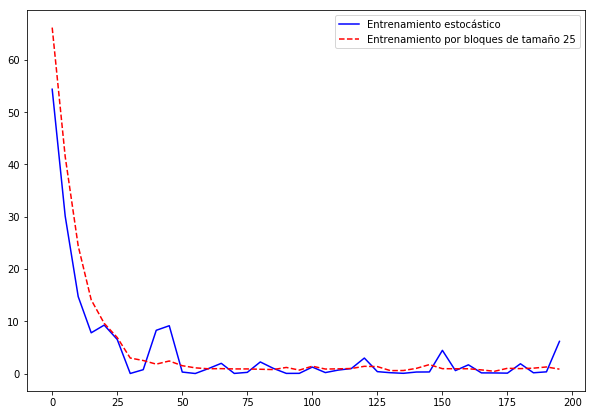

In [65]:
plt.figure(figsize=(10,7))
plt.plot(range(0,200,5), loss_stochastic, "b-", label="Entrenamiento estocástico")
plt.plot(range(0,200,5), loss_batch, "r--", label="Entrenamiento por bloques de tamaño 25")
plt.legend(loc="upper right", prop={"size":10})
plt.show()